In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Salary_Data.csv')
x = dataset["YearsExperience"].values
y = dataset["Salary"].values

In [2]:
xmean=np.mean(x)
ymean=np.mean(y)

In [3]:
num=np.sum((x-xmean)*(y-ymean))
den=np.sum((x-xmean)**2)

In [4]:
B1=num/den
print(B1)

9449.962321455077


In [5]:
B0=ymean-B1*xmean
print(B0)

25792.20019866869


In [6]:
y_pred=B0+B1*x
print(y_pred)

[ 36187.15875227  38077.15121656  39967.14368085  44692.12484158
  46582.11730587  53197.09093089  54142.08716303  56032.07962732
  56032.07962732  60757.06078805  62647.05325234  63592.04948449
  63592.04948449  64537.04571663  68317.03064522  72097.0155738
  73987.00803809  75877.00050238  81546.97789525  82491.9741274
  90051.94398456  92886.932681   100446.90253816 103281.8912346
 108006.87239533 110841.86109176 115566.84225249 116511.83848464
 123126.81210966 125016.80457395]


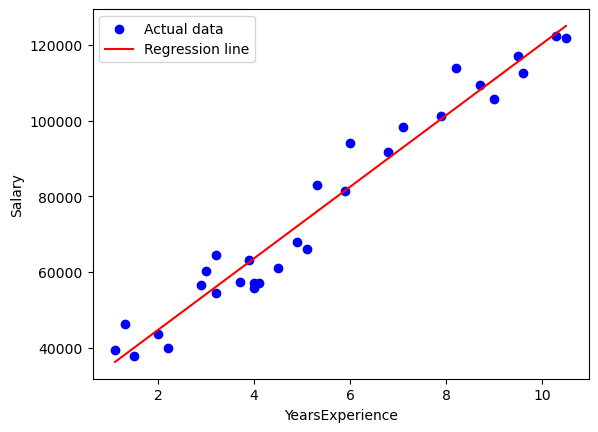

In [7]:
plt.scatter(x, y, color="blue", label="Actual data")
plt.plot(x, y_pred, color="red", label="Regression line")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [25]:
import numpy as np

def gradient_descent(X, y, initial_lr=0.01, decay_rate=0.01, epochs=1000, tol=1e-6):
    m = len(y)
    if X.ndim == 1:
        X = X.reshape(-1, 1)
    
    X = np.c_[np.ones((m, 1)), X]  
    
    theta = np.random.randn(X.shape[1]) 

    for epoch in range(epochs):
        gradient = (2/m) * X.T.dot(X.dot(theta) - y)

        lr = initial_lr / (1 + decay_rate * epoch)

        theta -= lr * gradient

        error = np.mean((X.dot(theta) - y) ** 2)

        if error < tol:
            print(f"Stopped early at epoch {epoch}, error={error:.6f}")
            break

    return theta

x = np.linspace(0, 10, 50)
y = 3 * x + 5 + np.random.randn(50)

gd_theta = gradient_descent(x, y)
print(f"Learned parameters (theta): {gd_theta}")


Learned parameters (theta): [3.93763888 3.19237917]


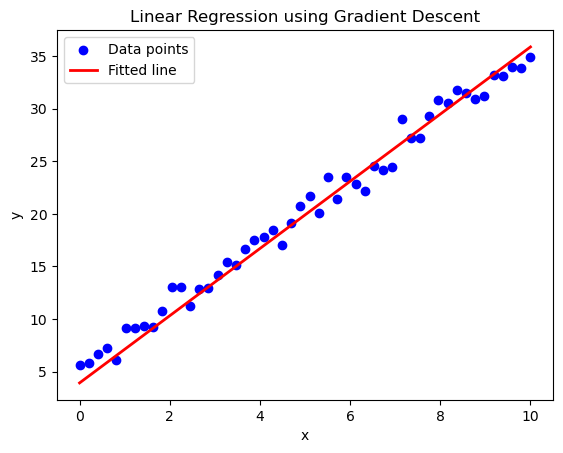

In [27]:
X_plot = np.c_[np.ones((len(x), 1)), x]
y_pred = X_plot.dot(gd_theta)
plt.scatter(x, y, color="blue", label="Data points")
plt.plot(x, y_pred, color="red", linewidth=2, label="Fitted line")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression using Gradient Descent")
plt.legend()
plt.show()

Coefficient (slope): [3.07110347]
Intercept: [4.53561396]


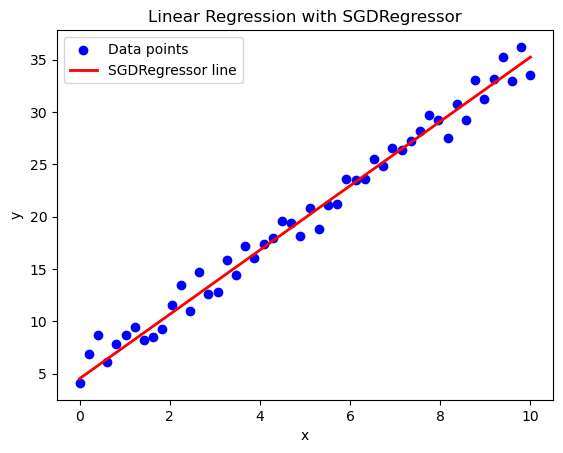

In [38]:
import numpy as np
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 50)
y = 3 * x + 5 + np.random.randn(50)

x = x.reshape(-1, 1)

sgd = SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.01, learning_rate='invscaling')
sgd.fit(x, y)

print("Coefficient (slope):", sgd.coef_)
print("Intercept:", sgd.intercept_)

y_pred = sgd.predict(x)

plt.scatter(x, y, color="blue", label="Data points")
plt.plot(x, y_pred, color="red", linewidth=2, label="SGDRegressor line")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression with SGDRegressor")
plt.legend()
plt.show()
